In [ ]:
#Keras library for CIFAR dataset
from keras.datasets import cifar10

#Downloading the CIFAR dataset
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

#importing other required libraries
import numpy as np
import pandas as pd
from sklearn.utils.multiclass import unique_labels
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from keras.utils import to_categorical

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
#Train-validation-test split
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.3)

#Dimension of the CIFAR10 dataset
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 1))
((15000, 32, 32, 3), (15000, 1))
((10000, 32, 32, 3), (10000, 1))


In [ ]:
#Onehot Encoding the labels.
from sklearn.utils.multiclass import unique_labels
from keras.utils import to_categorical

#Since we have 10 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 10
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

#Verifying the dimension after one hot encoding
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 10))
((15000, 32, 32, 3), (15000, 10))
((10000, 32, 32, 3), (10000, 10))


In [ ]:
#Image Data Augmentation
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1 )

val_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1)

test_generator = ImageDataGenerator(rotation_range=2, horizontal_flip= True,zoom_range=.1)

#Fitting the augmentation defined above to the data
train_generator.fit(x_train)
val_generator.fit(x_val)
test_generator.fit(x_test)

In [ ]:
#Learning Rate Annealer
from keras.callbacks import ReduceLROnPlateau
lrr= ReduceLROnPlateau(   monitor='val_acc',   factor=.01,   patience=3,  min_lr=1e-5)

In [ ]:
#Defining the model
base_model = tf.keras.applications.EfficientNetB5(include_top=False, weights="imagenet", input_shape=(32,32,3),classes=y_train.shape[1])

#Adding the final layers to the above base models where the actual classification is done in the dense layers

model= Sequential()
model.add(base_model) 
model.add(Flatten()) 

#Model summary
model.summary()

115263384/115263384 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb5 (Functional)  (None, 1, 1, 2048)       28513527  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
Total params: 28,513,527
Trainable params: 28,340,784
Non-trainable params: 172,743
_________________________________________________________________


In [ ]:
#Adding the Dense layers along with activation and batch normalization
model.add(Dense(1024,activation=('relu'),input_dim=512))

model.add(Dense(512,activation=('relu'))) 
model.add(Dense(256,activation=('relu'))) 
#model.add(Dropout(.3))
model.add(Dense(128,activation=('relu')))
#model.add(Dropout(.2))
model.add(Dense(10,activation=('softmax'))) 

#Checking the final model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb5 (Functional)  (None, 1, 1, 2048)       28513527  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 10)                1

In [ ]:
#Defining the parameters
batch_size= 100
epochs=10
learn_rate=.001

sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
#Compiling the model
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

#Training the model
model.fit_generator(train_generator.flow(x_train, y_train, batch_size = batch_size), epochs = epochs, steps_per_epoch = x_train.shape[0]//batch_size, validation_data = val_generator.flow(x_val, y_val, batch_size = batch_size), validation_steps = 50,  callbacks = [lrr], verbose = 1)

Epoch 1/10


<ipython-input-14-f70d3f44e77c>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator.flow(x_train, y_train, batch_size = batch_size), epochs = epochs, steps_per_epoch = x_train.shape[0]//batch_size, validation_data = val_generator.flow(x_val, y_val, batch_size = batch_size), validation_steps = 50,  callbacks = [lrr], verbose = 1)


350/350 [==============================] - ETA: 0s - loss: 2.2840 - accuracy: 0.1373

350/350 [==============================] - 77s 135ms/step - loss: 2.2840 - accuracy: 0.1373 - val_loss: 2.2484 - val_accuracy: 0.1808 - lr: 0.0010
Epoch 2/10
350/350 [==============================] - ETA: 0s - loss: 2.1345 - accuracy: 0.2305

350/350 [==============================] - 44s 126ms/step - loss: 2.1345 - accuracy: 0.2305 - val_loss: 2.0643 - val_accuracy: 0.2520 - lr: 0.0010
Epoch 3/10
350/350 [==============================] - ETA: 0s - loss: 1.7918 - accuracy: 0.3549

350/350 [==============================] - 49s 141ms/step - loss: 1.7918 - accuracy: 0.3549 - val_loss: 1.6953 - val_accuracy: 0.3772 - lr: 0.0010
Epoch 4/10
350/350 [==============================] - ETA: 0s - loss: 1.5034 - accuracy: 0.4559

350/350 [==============================] - 45s 128ms/step - loss: 1.5034 - accuracy: 0.4559 - val_loss: 1.5640 - val_accuracy: 0.4398 - lr: 0.0010
Epoch 5/10
350/350 [==============================] - ETA: 0s - loss: 1.3116 - accuracy: 0.5269

350/350 [==============================] - 45s 130ms/step - loss: 1.3116 - accuracy: 0.5269 - val_loss: 1.2000 - val_accuracy: 0.5666 - lr: 0.0010
Epoch 6/10
350/350 [==============================] - ETA: 0s - loss: 1.1692 - accuracy: 0.5805

350/350 [==============================] - 45s 127ms/step - loss: 1.1692 - accuracy: 0.5805 - val_loss: 1.0882 - val_accuracy: 0.6090 - lr: 0.0010
Epoch 7/10
350/350 [==============================] - ETA: 0s - loss: 1.0603 - accuracy: 0.6254

350/350 [==============================] - 45s 128ms/step - loss: 1.0603 - accuracy: 0.6254 - val_loss: 0.9900 - val_accuracy: 0.6442 - lr: 0.0010
Epoch 8/10
350/350 [==============================] - ETA: 0s - loss: 0.9856 - accuracy: 0.6546

350/350 [==============================] - 43s 124ms/step - loss: 0.9856 - accuracy: 0.6546 - val_loss: 0.9188 - val_accuracy: 0.6734 - lr: 0.0010
Epoch 9/10
350/350 [==============================] - ETA: 0s - loss: 0.9127 - accuracy: 0.6798

350/350 [==============================] - 45s 128ms/step - loss: 0.9127 - accuracy: 0.6798 - val_loss: 0.8710 - val_accuracy: 0.6914 - lr: 0.0010
Epoch 10/10
350/350 [==============================] - ETA: 0s - loss: 0.8567 - accuracy: 0.6997

350/350 [==============================] - 45s 129ms/step - loss: 0.8567 - accuracy: 0.6997 - val_loss: 0.8293 - val_accuracy: 0.7076 - lr: 0.0010


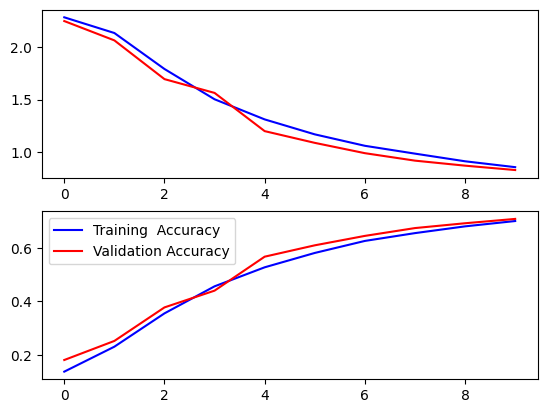

In [ ]:
import matplotlib.pyplot as plt
#Plotting the training and validation loss

f,ax=plt.subplots(2,1) #Creates 2 subplots under 1 column

#Assigning the first subplot to graph training loss and validation loss
ax[0].plot(model.history.history['loss'],color='b',label='Training Loss')
ax[0].plot(model.history.history['val_loss'],color='r',label='Validation Loss')

#Plotting the training accuracy and validation accuracy
ax[1].plot(model.history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(model.history.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()